In [1]:
!pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 4.0 MB/s 


In [2]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator

#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
import tensorflow.keras as keras 
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras import regularizers


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [3]:
#Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train shape :' ,X_train.shape,y_train.shape)
print('Test shape: ',X_test.shape,y_test.shape)



4431872/4422102 [==============================] - 0s 0us/step
Train shape : (60000, 28, 28) (60000,)
Test shape:  (10000, 28, 28) (10000,)


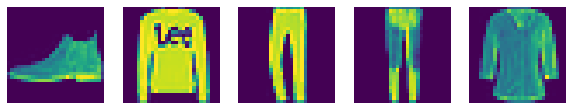

Labels: [9 2 1 1 6]


In [4]:
# Let us look at the sample from dataset first five images

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i]) 
    plt.axis('off')
plt.show()
print('Labels: %s' % (y_test[0:5]))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


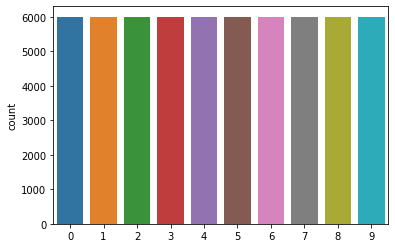

In [5]:
# Find the number of class labels and their split in dataset

import seaborn as sns
sns.countplot(y_train)

Label Id:  0


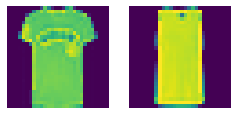

Label Id:  1


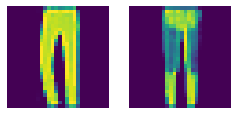

Label Id:  2


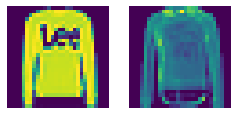

Label Id:  3


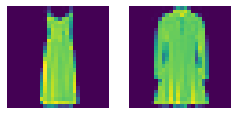

Label Id:  4


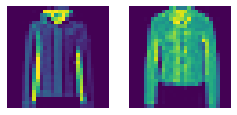

Label Id:  5


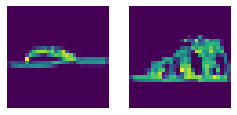

Label Id:  6


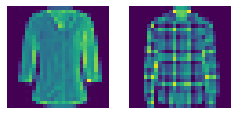

Label Id:  7


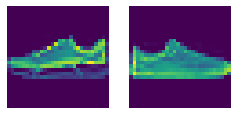

Label Id:  8


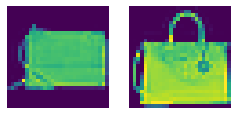

Label Id:  9


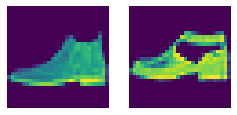

In [6]:
# Let us visualize two examples for each label class to understand the input dataset

sample_images = []
sample_labels = []
for label in range(10):
  result = np.where(y_test == label)
  print("Label Id: ",label)
  plt.figure(figsize=(4, 4))
  for i in range(2):
      idx = result[0][i]
      if i == 0:
        sample_images.append(X_test[idx])
        sample_labels.append(y_test[idx])
      plt.subplot(1, 2, i+1)
      plt.imshow(X_test[idx]) 
      plt.axis('off')
  plt.show()


In [7]:
# Based on the images for the label we will name them for clarity
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
from numpy import expand_dims
np_sample_images = np.array(sample_images)
np_sample_images = np_sample_images.reshape(np_sample_images.shape[0],28, 28,1)
np_sample_labels = np.array(sample_labels)

In [ ]:
# Let us do data augmentation:


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 10, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [10]:
# Print original and augment images 
def print_augmented_images(datagen,np_sample_images,np_sample_labels):
  # prepare iterator
  it = datagen.flow(np_sample_images,np_sample_labels, batch_size=10)
  # generate batch of images
  (batch,labels) = it.next()
  print("Sample Input Dataset:")
  plt.figure(figsize=(20, 8))
  for i in range(10):
    # define subplot
    plt.subplot(2,5,i+1)   
    # convert to unsigned integers for viewing
    #image = modified_img_arr[i].astype('uint8')
    # plot raw pixel data
    plt.imshow(np_sample_images[i].reshape(28,28))
    plt.title("Label: {}".format(y_labels[np_sample_labels[i]]))
  plt.show()
  print("\n\n\nData Augumented Dataset:")
  plt.figure(figsize=(20, 8))
  for i in range(10):
    plt.subplot(2,5,i+1)
    # show the aug figure
    modified_img = batch[i].reshape(28,28)
    plt.imshow(modified_img)
    plt.title("Label: {}".format(y_labels[labels[i]]))
  plt.show()

Rotation Range Augmentation
Sample Input Dataset:


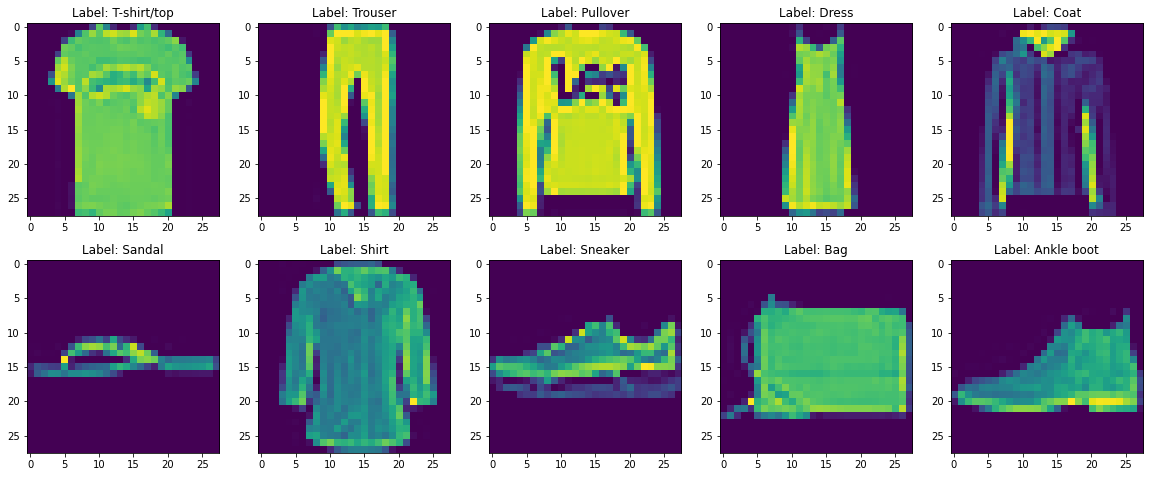




Data Augumented Dataset:


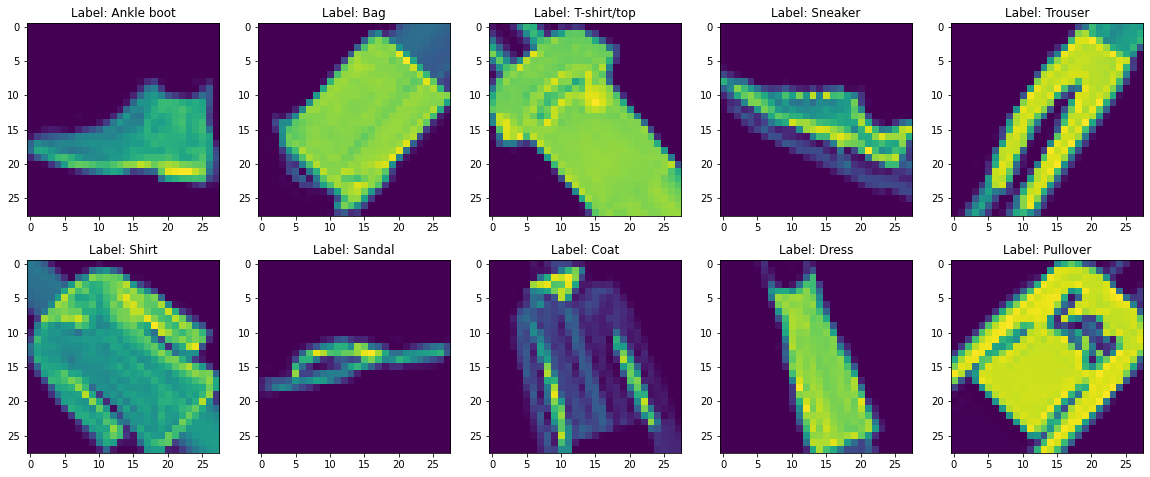

In [11]:
# Rotation Range Augmentation
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=50)
print("Rotation Range Augmentation")
print_augmented_images(datagen,np_sample_images,np_sample_labels)

Height Shift Range Augmentation
Sample Input Dataset:


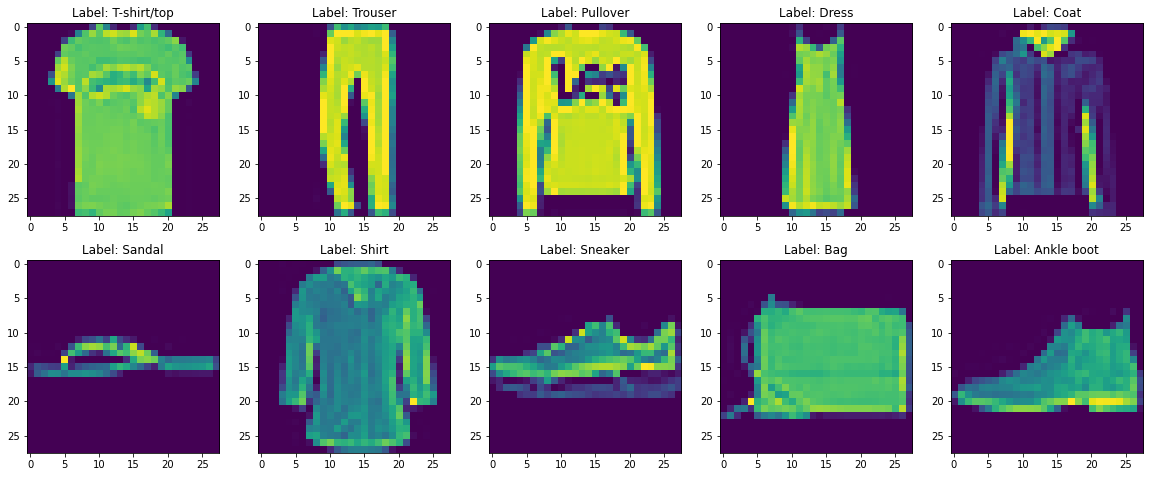




Data Augumented Dataset:


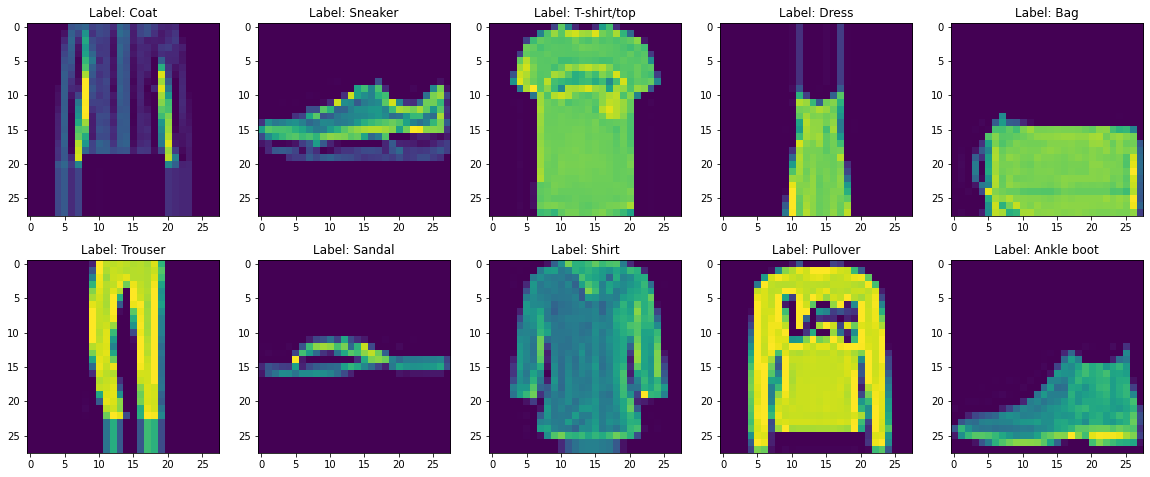

In [12]:
# Height Shift Range Augmentation
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=10)
print("Height Shift Range Augmentation")
print_augmented_images(datagen,np_sample_images,np_sample_labels)

In [13]:

# Dataset formating for Model Building

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

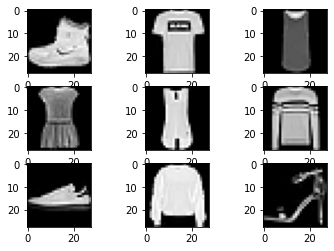

In [14]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(np.squeeze(X_train[i]), cmap=pyplot.get_cmap('gray'))
pyplot.show()

### Util functions used 

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
def print_loss_acc(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [17]:
def get_model_attribute(attribute, best_model):
  for i, layer in enumerate (best_model.layers):
    print (i, layer)
    try:
        print (attribute+"-----> ",getattr(layer,attribute))
    except AttributeError:
        print('Debug: No attribute found')


In [18]:
def print_confusion(best_model):

  y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  # Predict the values from the validation dataset
  Y_pred = best_model.predict(X_test)
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(y_test,axis = 1) 
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
  # plot the confusion matrix
  plot_confusion_matrix(confusion_mtx, y_labels, normalize=False)

  incorrects = np.nonzero( Y_pred_classes != Y_true)


### Model Building

In [ ]:
## Reference Simple Model
# We use sample model with three layers to begin 
# we use relu activation for hidden layers because it is better for image classification. it favours positive points. 
# and softmax for outlayer since the output is categorical values with 10 states

In [19]:
metrics = tf.keras.metrics
model = Sequential([
    Flatten(input_shape=(28,28,1), name = 'input_layer'),
    
    # hidden layer 1     
    Dense(64, activation = 'relu', name = 'hidden_layer_1'),
    
    # hidden layer 2
    Dense(32,  activation = 'relu', name = 'hidden_layer_2'),
    
    # hidden layer 3
    Dense(16,  activation = 'relu', name = 'hidden_layer_3'),
    
    # output layer
    Dense(10,  activation = 'softmax', name = 'output_layer')
])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                50240     
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 hidden_layer_3 (Dense)      (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [21]:
# loss function is Categorical Cross entropy because the output here is 10 possible category labels
# SGD is used as optimizer as there is not much intuition here with the problem statement. 
# Hence to begin with SGD is standard optimizer that would help here
# learning rate of 0.01 is selected as initial value.
# we dont want the value to be very small so that training of dataset will be slower. but not too big so it does not understand coverage to optimum.
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy', metrics.Precision(), metrics.Recall()]
)

In [29]:
# Since the machine is 4 core processor, we use batch size as multiples of 4. we selected 64 as choice to begin with and optimize further
# epoch as 10 to understand the learning progress
# Here the validation split is considered as 20% since we have 60K records in dataset.
# we are using separate test set of 10K records for prediction/evaluation.
history = model.fit(X_train,y_train, validation_split = .2,batch_size=64,epochs = 10)

Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3952 - accuracy: 0.8708 - val_loss: 0.3846 - val_accuracy: 0.8757
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3932 - accuracy: 0.8712 - val_loss: 0.3838 - val_accuracy: 0.8792
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3920 - accuracy: 0.8734 - val_loss: 0.3848 - val_accuracy: 0.8802
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3914 - accuracy: 0.8737 - val_loss: 0.3880 - val_accuracy: 0.8778
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3910 - accuracy: 0.8749 - val_loss: 0.3816 - val_accuracy: 0.8798
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3894 - accuracy: 0.8750 - val_loss: 0.3753 - val_accuracy: 0.8826
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3900 - accuracy: 0.8747 - val_loss: 0.3829 - val_accuracy: 0.8788
Epoch 

Adding L2 regularizer /Drop out to check whether we will get a better result
Dropout are added only in the inner hidden layers. we dont want to drop learned features in the later hidden layers.
also the dropout value is reduced as we progress through the hidden layers.

In [23]:
model = Sequential([
 Flatten(input_shape=(28,28,1), name = 'input_layer'),
 
 Dense(64, activation = 'relu', name = 'hidden_layer_1',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dropout(0.25),
 Dense(32,  activation = 'relu', name = 'hidden_layer_2',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dropout(0.15),
 Dense(16,  activation = 'relu', name = 'hidden_layer_3',
 kernel_regularizer=regularizers.l2(0.0001)),

Dense(10,  activation = 'softmax', name = 'output_layer'),
 ])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_layer_3 (Dense)      (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 10)               

In [25]:
from time import time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time()
trained_model = model.fit(X_train, y_train, epochs = 20, batch_size=64, validation_split=.2)
print("Total time take for training (secs): ",time()-start)


Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.8525 - accuracy: 0.7054 - val_loss: 0.5089 - val_accuracy: 0.8244
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5513 - accuracy: 0.8151 - val_loss: 0.4463 - val_accuracy: 0.8504
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5012 - accuracy: 0.8288 - val_loss: 0.4314 - val_accuracy: 0.8521
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4711 - accuracy: 0.8423 - val_loss: 0.4133 - val_accuracy: 0.8593
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4604 - accuracy: 0.8460 - val_loss: 0.4068 - val_accuracy: 0.8621
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4465 - accuracy: 0.8508 - val_loss: 0.3922 - val_accuracy: 0.8677
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4384 - accuracy: 0.8551 - val_loss: 0.3931 - val_accuracy: 0.8707
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


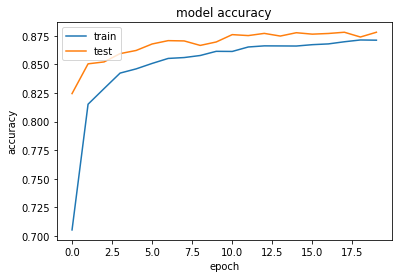

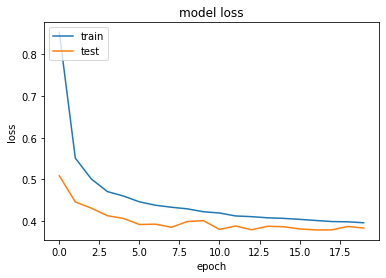

In [26]:
# list all data in history
print(trained_model.history.keys())
# summarize history for accuracy
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
import itertools 
from sklearn.metrics import confusion_matrix

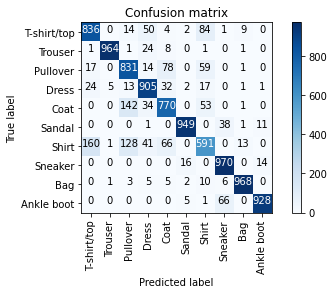

In [32]:
#Print confusion matrix for the trained model

#print_confusion(model)

y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, y_labels, normalize=False)



### Report:
- Here the best performing Class is **Sneaker**
- And the worst performing Class is **Shirt**

### Incorrect predictions

Most inaccurate Predicted images for given class
 True class Label:  T-shirt/top


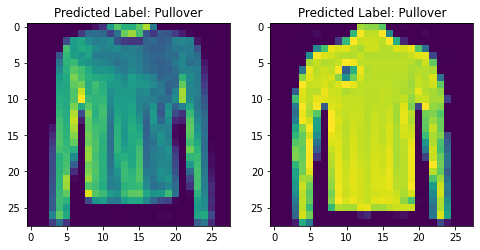

 True class Label:  Trouser


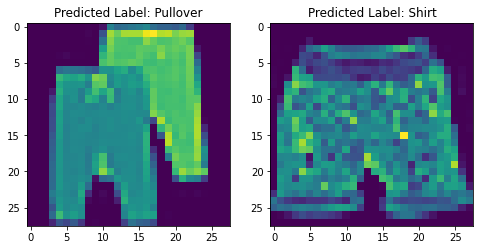

 True class Label:  Pullover


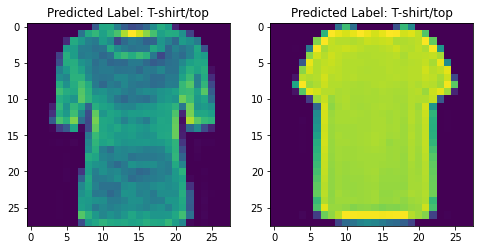

 True class Label:  Dress


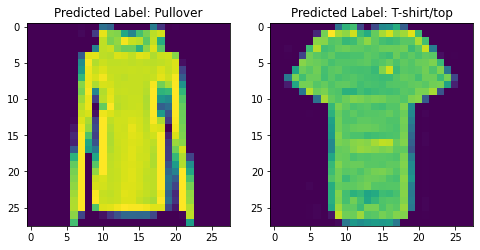

 True class Label:  Coat


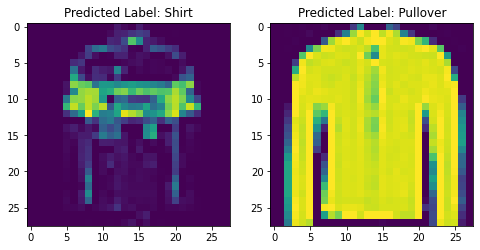

 True class Label:  Sandal


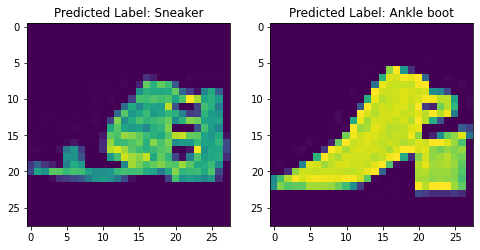

 True class Label:  Shirt


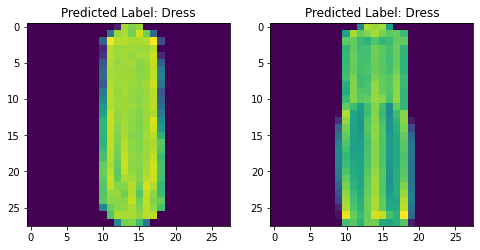

 True class Label:  Sneaker


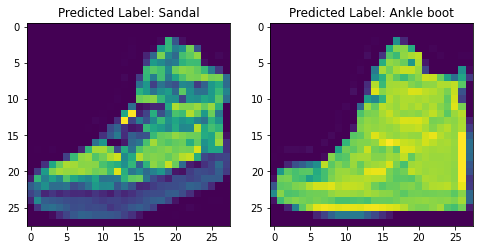

 True class Label:  Bag


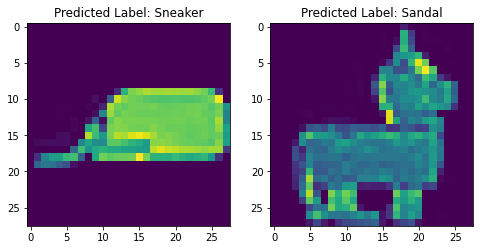

 True class Label:  Ankle boot


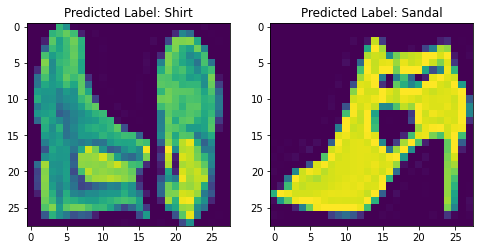

In [34]:
incorrect_pred = np.where( Y_pred_classes != Y_true)
Index = []
True_Label = []
Pred_prob = []
for item in incorrect_pred[0]:
  Index.append(item)
  True_Label.append(Y_true[item])
  Pred_prob.append(Y_pred[item][Y_true[item]])
data = {'Index':Index,
        'True_Label':True_Label,
        'Pred_prob':Pred_prob}
df = pd.DataFrame(data)

incorrect_items={}
for label in range(10):
  incorrect_items[label] = []
  min_idx = df.loc[df.True_Label==label, 'Pred_prob'].idxmin()
  incorrect_items[label].append(df.loc[min_idx, 'Index'])
  df =  df.drop(min_idx)
  min_idx = df.loc[df.True_Label==label, 'Pred_prob'].idxmin()
  incorrect_items[label].append(df.loc[min_idx, 'Index'])

print("Most inaccurate Predicted images for given class")
for idx in incorrect_items:
  print(" True class Label: ", y_labels[idx])
  plt.figure(figsize=(8, 8))
  for i in range(2):
    plt.subplot(1,2,i+1)
    # show the aug figure
    failed_img = X_test[incorrect_items[idx][i]].reshape(28,28)
    plt.imshow(failed_img)
    plt.title("Predicted Label: {}".format(y_labels[Y_pred_classes[incorrect_items[idx][i]]]))
  plt.show()

#### Hyperparameter Tuning Based on Two Condition as stated in the assignment:

### Condition 1: Changing Model with more Hidden layers and nodes:


In [35]:
# added four layers with additional nodes for 
tune_model_1 = Sequential([
 Flatten(input_shape=(28,28,1), name = 'input_layer'),
 
 Dense(128, activation = 'relu', name = 'hidden_layer_1',
 kernel_regularizer=regularizers.l2(0.0001)),

 Dense(96,  activation = 'relu', name = 'hidden_layer_2',
 kernel_regularizer=regularizers.l2(0.0001)),

 Dense(64,  activation = 'relu', name = 'hidden_layer_3',
 kernel_regularizer=regularizers.l2(0.0001)),

 Dense(32,  activation = 'relu', name = 'hidden_layer_4',
 kernel_regularizer=regularizers.l2(0.0001)),

Dense(10,  activation = 'softmax', name = 'output_layer'),
 ])

In [36]:
tune_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 96)                12384     
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                6208      
                                                                 
 hidden_layer_4 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 121,482
Trainable params: 121,482
Non-tr

In [37]:
from time import time
tune_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time()
h_model_1 = tune_model_1.fit(X_train, y_train, epochs = 20, batch_size=64, validation_split=.2)
print("Total time take for training (secs): ",time()-start)

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.6037 - accuracy: 0.8008 - val_loss: 0.4658 - val_accuracy: 0.8493
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4349 - accuracy: 0.8568 - val_loss: 0.4286 - val_accuracy: 0.8557
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4034 - accuracy: 0.8684 - val_loss: 0.4192 - val_accuracy: 0.8654
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3795 - accuracy: 0.8767 - val_loss: 0.4136 - val_accuracy: 0.8660
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3625 - accuracy: 0.8832 - val_loss: 0.4167 - val_accuracy: 0.8704
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3549 - accuracy: 0.8866 - val_loss: 0.3957 - val_accuracy: 0.8740
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3413 - accuracy: 0.8915 - val_loss: 0.3890 - val_accuracy: 0.8763
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


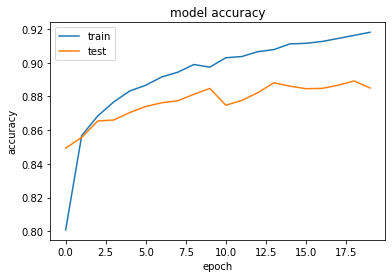

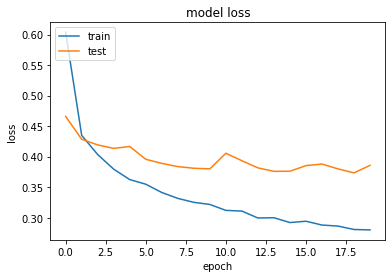

In [38]:
# list all data in history
print(h_model_1.history.keys())
# summarize history for accuracy
plt.plot(h_model_1.history['accuracy'])
plt.plot(h_model_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h_model_1.history['loss'])
plt.plot(h_model_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

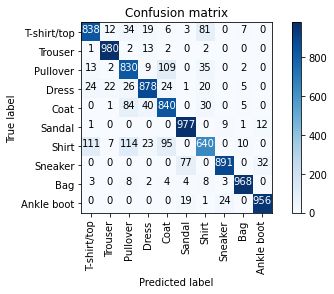

In [39]:
#Print confusion matrix for the trained model

#print_confusion(model)

y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Predict the values from the validation dataset
Y_pred = tune_model_1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, y_labels, normalize=False)

### Condition 2: Changing the same Model by removing regularization:


In [45]:
# added four layers with additional nodes w/o regularization 
tune_model_2 = Sequential([
 Flatten(input_shape=(28,28,1), name = 'input_layer'),
 
 Dense(128, activation = 'relu', name = 'hidden_layer_1'),

 Dense(96,  activation = 'relu', name = 'hidden_layer_2'),

 Dense(64,  activation = 'relu', name = 'hidden_layer_3'),

 Dense(32,  activation = 'relu', name = 'hidden_layer_4'),

Dense(10,  activation = 'softmax', name = 'output_layer'),
 ])

In [46]:
tune_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 96)                12384     
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                6208      
                                                                 
 hidden_layer_4 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 121,482
Trainable params: 121,482
Non-tr

In [49]:
from time import time
tune_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time()
h_model_2 = tune_model_2.fit(X_train, y_train, epochs = 20, batch_size=64, validation_split=.2)
print("Total time take for training (secs): ",time()-start)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1794 - accuracy: 0.9312 - val_loss: 0.3442 - val_accuracy: 0.8929
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1706 - accuracy: 0.9353 - val_loss: 0.3631 - val_accuracy: 0.8888
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1693 - accuracy: 0.9343 - val_loss: 0.3571 - val_accuracy: 0.8913
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1660 - accuracy: 0.9363 - val_loss: 0.3626 - val_accuracy: 0.8940
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1592 - accuracy: 0.9386 - val_loss: 0.3713 - val_accuracy: 0.8908
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1570 - accuracy: 0.9407 - val_loss: 0.3703 - val_accuracy: 0.8936
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1542 - accuracy: 0.9407 - val_loss: 0.3741 - val_accuracy: 0.8947
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


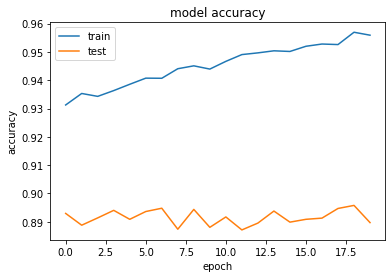

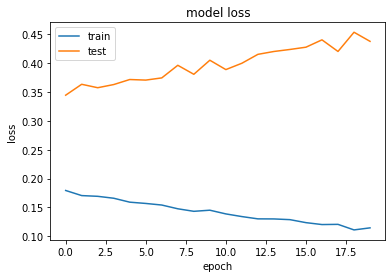

In [50]:
# list all data in history
print(h_model_2.history.keys())
# summarize history for accuracy
plt.plot(h_model_2.history['accuracy'])
plt.plot(h_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h_model_2.history['loss'])
plt.plot(h_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

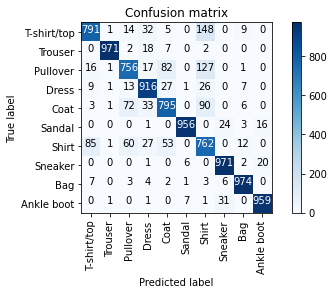

In [51]:
#print_confusion(model)

y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Predict the values from the validation dataset
Y_pred = tune_model_2.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, y_labels, normalize=False)

In [52]:
data_summary={
    'Name':['Model_1','Model_2'],
    'Description':['With 4 hidden layers and 320 hidden nodes with L2','Same as about with out L2'],
    'Training Time':['82','56'],
    'Worst Performing Class':['Shirt','Shirt'],
    'Best Performing Class':['Trouser','Bags'],
    'Max Training Accuracy':['91','95'],
    'Max Validation Accuracy':['89','89'],
    'Summary':['Here, traing time is increased becasue of additional computational. \n but the model over fitting is reduced ','Training is reduced because there is no regualrization. but the gap with Training and validation accuracy is more. hence more over fitting.']
}

results=pd.DataFrame(data_summary)
results

,Name,Description,Training Time,Worst Performing Class,Best Performing Class,Max Training Accuracy,Max Validation Accuracy,Summary
0,Model_1,With 4 hidden layers and 320 hidden nodes with L2,82,Shirt,Trouser,91,89,"Here, traing time is increased becasue of addi..."
1,Model_2,Same as about with out L2,56,Shirt,Bags,95,89,Training is reduced because there is no regual...
